# Homework 1


## By Vyanna Hill

### Chapter 1

In [1]:
import numpy as np
import pint
from modsim import *

In [2]:
# From Chapter 1 section, by Allen Downey
    # Configure Jupyter so figures appear in the notebook
    %matplotlib inline

    # Configure Jupyter to display the assigned value after an assignment
    %config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

In [3]:
meter = UNITS.meter
second = UNITS.second
a = 9.8 * meter / second**2
t = 4 * second
a * t**2 / 2


78.4 <Unit('meter')>

Exercise 1
    It's velocity is 39.2 m/s

In [4]:
#Exercise 1
v = a * t


39.2 <Unit('meter / second')>

Exercise 2  
We cannot add a and t as they are different units and will get a error for conversion

In [5]:
#e=a+t


In [6]:
h = 381 * meter
t = sqrt(2 * h / a)
v = a * t
mile = UNITS.mile
hour = UNITS.hour
v.to(mile/hour)



193.30546802805432 <Unit('mile / hour')>

Exercise 3
The leading metric of the equation will be the final conversion result.


In [7]:
foot=UNITS.foot
#Adding h to pole height will convert the results into meters
pole_height=10*foot
m=h+pole_height


384.048 <Unit('meter')>

In [8]:
#Adding pole_hieght to h will convert the results into foot
f=pole_height+h

1260.0 <Unit('foot')>

Exercise 4
1:
    v=a*t for the velocity at accelration a and time t
    so finding t will will change the formula to t=v/a
    we have v as 18 m/s and our constant a. Our result is ~1.84 seconds


In [9]:
vel_1=18*(meter/second)
t_1=vel_1/a

1.8367346938775508 <Unit('second')>

exercise 2
    Finding the distance during our given time t, we compute 
      h=at^2/2
      It fell a distance of ~16.53 meters
      

In [10]:
distance_1=(a*t_1**2)/2


16.530612244897956 <Unit('meter')>

3:
    For finding how long it will take the penny to fall the rest of the distance at a velocity f 18 m/s
    use the velocity formula and transform into t= d/v
    d= h - distance_1 ( what we already traveled)
    v= 18 m/s
    t=d/v == ~20.25 sec
    It took aorund 20 sec to fall from the remaining distnace at a velocity of 18 m/s
    
    

In [11]:
dis_diff=h-distance_1
t_2=dis_diff/vel_1

20.24829931972789 <Unit('second')>

Exercise 5

After selcting Restart and Run all,Exercise 2 error will stop the other sections from displaying their outputs.
I commented out Exercise 2 for the results I want shown.

### Chapter 2


In [12]:
#From Chapter 2, Allen Downey
    # import functions from the modsim library
    from modsim import *
    
    # set the random number generator
    np.random.seed(7)

    # If this cell runs successfully, it produces no output.

Exercise 1
If you mispell the varaible and call it, it will result in a error of a unknown function

In [14]:
bikeshare = State(olin=10, wellesley=2)
bikeshare.wellesley
#Will trigger a error if un-commented
#bikeshare.welleeeesley


2

Exercise 2
    After we intialized the attribute babson, the attribute will display zero when its called.

In [15]:
bikeshare = State(olin=10, wellesley=2,babson=0)
bikeshare.babson


0

In [16]:
def bike_to_wellesley():
    bikeshare.olin -= 1
    bikeshare.wellesley += 1
bike_to_wellesley()
bikeshare

,values
olin,9
wellesley,3
babson,0


Exercise 3
We created the function bike to olin
    it removes one bike from wellesly and adds it to olin
    

In [17]:
def bike_to_olin():
    bikeshare.olin+=1
    bikeshare.wellesley-=1
bike_to_olin()
bikeshare

,values
olin,10
wellesley,2
babson,0


Exercise 4
    Those are the p values I expected, as the print statement made no sigificant difference in the function.
    

In [21]:
bikeshare = State(olin=10, wellesley=2)

def step(p1, p2):
    print(p1)
    print(p2)
    if flip(p1):
        bike_to_wellesley()
        print('Moving a bike to Wellesley')
        
    if flip(p2):
        bike_to_olin()
        print('Moving a bike to Olin')
        
step(0.3, 0.2)
bikeshare

0.3
0.2
Moving a bike to Olin


,values
olin,11
wellesley,1


Exercise 5
    

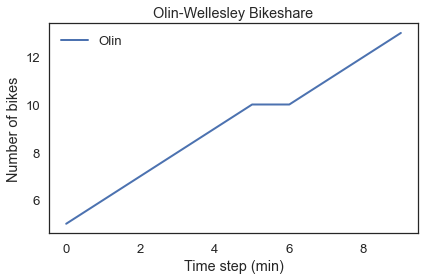

In [34]:
def run_simulation (p1,p2,num_steps):
    results = TimeSeries()
    result = TimeSeries()

    def step(p1, p2):
        if flip(p1):
            bike_to_wellesley()

        if flip(p2):
            bike_to_olin()  
    for i in range(num_steps):
        step(p1, p2)
        results[i] = bikeshare.olin
        
    plot(results,label='Olin')

    decorate(title='Olin-Wellesley Bikeshare',
         xlabel='Time step (min)', 
         ylabel='Number of bikes')
    
bikeshare = State(olin=5, wellesley=10) 
run_simulation(0.2,0.8,10)

### Chapter 3


Exercise 1
    The if else statement prints as expected

In [39]:
x=5
if x == 5:
    print('yes, x is 5')
elif x>5:
    print('No, x is not 5 but its greater than 5')
elif x<5:
    print("No, x is not 5 but it's less than 5")
else:
    print('No, x is not 5')

yes, x is 5


Exercise 2

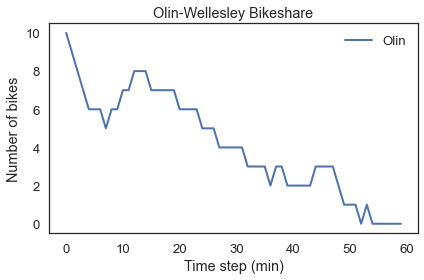

In [40]:
def step(state, p1, p2):
    if flip(p1):
        bike_to_wellesley(state)
    
    if flip(p2):
        bike_to_olin(state)
        
def bike_to_wellesley(state):
    if state.olin == 0:
        state.olin_empty += 1
        state.clock+=1
        return
    state.olin -= 1
    state.wellesley += 1
    
def bike_to_olin(state):
    if state.wellesley == 0:
        state.wellesley_empty += 1
        state.clock+=1
        return
    state.wellesley -= 1
    state.olin += 1
    
def decorate_bikeshare():
    """Add a title and label the axes."""
    decorate(title='Olin-Wellesley Bikeshare',
             xlabel='Time step (min)', 
             ylabel='Number of bikes')
def run_simulation(state, p1, p2, num_steps):
    results = TimeSeries()    
    for i in range(num_steps):
        step(state, p1, p2)
        results[i] = state.olin
        
    plot(results, label='Olin') 
    
bikeshare = State(olin=10, wellesley=2,olin_empty=0, wellesley_empty=0,clock=0)
run_simulation(bikeshare, 0.4, 0.2, 60)
bikeshare.clock
decorate_bikeshare()
    

In [41]:
bikeshare.clock



3

Exercise 4

,values
olin,0
wellesley,12
olin_empty,0
wellesley_empty,1
clock,1
t_first_empty,1


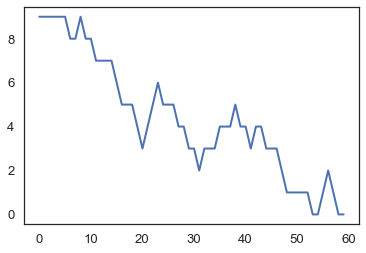

In [68]:
def step(state, p1, p2):
    if flip(p1):
        bike_to_wellesley(state)
    
    if flip(p2):
        bike_to_olin(state)
    
        
        
def bike_to_wellesley(state):
    if state.olin == 0:
        if state.wellesley_empty==0 and state.olin_empty==0:
            state.wellesley_empty += 1
            state.clock+=1
            state.t_first_empty=state.clock
            return 
        state.olin_empty += 1
        state.clock+=1
        return
    state.olin -= 1
    state.wellesley += 1    
def bike_to_olin(state):
    if state.wellesley == 0:
        if state.wellesley_empty==0 and state.olin_empty==0:
            state.wellesley_empty += 1
            state.clock+=1
            state.t_first_empty=state.clock
            return
        state.wellesley_empty += 1
        state.clock+=1
        return
    state.wellesley -= 1
    state.olin += 1
    
def decorate_bikeshare():
    """Add a title and label the axes."""
    decorate(title='Olin-Wellesley Bikeshare',
             xlabel='Time step (min)', 
             ylabel='Number of bikes')
def run_simulation(state, p1, p2, num_steps):
    results = TimeSeries()    
    for i in range(num_steps):
        step(state, p1, p2)
        results[i] = state.olin
        
    plot(results, label='Olin') 
    
bikeshare = State(olin=10, wellesley=2,olin_empty=0, wellesley_empty=0,clock=0,t_first_empty=-1)
run_simulation(bikeshare, 0.4, 0.2, 60)
bikeshare
